# Environment Setup

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

# Q-learning_M3-eps0.1-P4321.py

In [ ]:
import numpy as np
import random
import pandas as pd

# calculate the next state according to the current state and action
def nextState(state,action):
    (i,j) = state
    if action=='down':
        if i==row-1:
            return state
        next = (i+1,j)
    elif action=='left':
        if j==0:
            return state
        next = (i,j-1)
    elif action=='up':
        if i==0:
            return state
        next = (i-1,j)
    elif action=='right':
        if j == col-1:
            return state
        next = (i,j+1)
    if next in wall:
        next = state
    return next

# define the immediate reward
def immediateReward(state,action,lose):
    if nextState(state,action)== goal:
        return 100
    elif nextState(state,action)== lose:
        return -100
    else:
        return 0

# choose max_Q action
def maxAction(state,Q):
    Qs=[(action,Q[(state,action)]) for action in actions]
    action_max = max(Qs, key=lambda x:x[1])
    index = [j for j,x in enumerate(Qs) if x[1] == action_max[1]]
    if len(index) == 1:
        return action_max[0]
    else:
        return Qs[int(random.choice(index))][0]

def explore():
    return random.choice(actions)

# choose predator area with the defined probability range
def predator(random_seed):
    if random_seed <= prob_predator[0]:
        return random.choice(predator1)
    elif prob_predator[0]< random_seed and random_seed <= prob_predator[1]:
        return random.choice(predator2)
    elif prob_predator[1] < random_seed and random_seed <= prob_predator[2]:
        return random.choice(predator3)
    else:
        preda = []
        return preda

# Greedy functions
def Greedy(state, eps, Q):
    if random.random() < eps:
        return explore()
    else:
        return maxAction(state,Q)

def run_experiment(iteration_n,row,col,discount):
    eps = 1.0
    Q = {}
    discount = discount
    k = 5
    win_N = 0
    Q1 = {}
    Q2 = {}
    Q3 = {}
    Q4 = {}
    Prob_e = []
    Step_to_go = []

    # initial Q-tables
    for i in range(row):
        for j in range(col):
            for action in actions:
                Q1[(i, j), action] = 0
                Q2[(i, j), action] = 0
                Q3[(i, j), action] = 0
                Q4[(i, j), action] = 0

    for episode in range(iteration_n):
        max_step1 = max_step2 = max_step3 = max_step4= max_step= 0
        '''
        # case 2
        if ((episode+1) % k) == 0:
            eps = eps / 1.1
        '''
        eps = 0.1 # Please change the value of epsilon to 0.01/0.1/0.3/0.6/0.8
        a = 1

        state1 = startState
        lose1 = predator(0.3) # predator appears in area 1
        while(state1 != goal and state1 != lose1 and max_step1<=600):
            action = Greedy(state1, eps, Q1)
            reward = immediateReward(state1,action,lose1)
            newState1 = nextState(state1,action)
            if (newState1 != state1) and (state1 not in wall):
                # calculate the Q table in the situation where a predator appears in area 1
                Q1[(state1, action)] = (1-a)*Q1[(state1,action)] + a * (reward + discount*Q1[(newState1, maxAction(newState1,Q1))])
            state1 = newState1
            max_step1 = max_step1 + 1

        state2 = startState
        lose2 = predator(0.5) # predator appears in area 2
        while (state2 != goal and state2 != lose2 and max_step2<=600):
            action = Greedy(state2, eps, Q2)
            reward = immediateReward(state2, action, lose2)
            newState2 = nextState(state2, action)
            if (newState2 != state2) and (state2 not in wall):
                # calculate the Q table in the situation where a predator appears in area 2
                Q2[(state2, action)] = (1 - a) * Q2[(state2, action)] + a * (
                            reward + discount * Q2[(newState2, maxAction(newState2, Q2))])
            state2 = newState2
            max_step2 = max_step2 + 1

        state3 = startState
        lose3 = predator(0.8) # predator appears in area 3
        while (state3 != goal and state3 != lose3 and max_step3<=600):
            action = Greedy(state3, eps, Q3)
            reward = immediateReward(state3, action, lose3)
            newState3 = nextState(state3, action)
            if (newState3 != state3) and (state3 not in wall):
                # calculate the Q table in the situation where a predator appears in area 3
                Q3[(state3, action)] = (1 - a) * Q3[(state3, action)] + a * (
                        reward + discount * Q3[(newState3, maxAction(newState3, Q3))])
            state3 = newState3
            max_step3 = max_step3 + 1

        state4 = startState
        lose4 = predator(0.95) # predator no appears
        while (state4 != goal and state4 != lose4 and max_step4<=600):
            action = Greedy(state4, eps, Q4)
            reward = immediateReward(state4, action, lose4)
            newState4 = nextState(state4, action)
            if (newState4 != state4) and (state4 not in wall):
                # calculate the Q table in the situation where a predator no appears
                Q4[(state4, action)] = (1 - a) * Q4[(state4, action)] + a * (
                        reward + discount * Q4[(newState4, maxAction(newState4, Q4))])
            state4 = newState4
            max_step4 = max_step4 + 1

        for i in range(row):
            for j in range(col):
                for action in actions:
                    update = prob_predator[0]*Q1[(i,j),action]+(prob_predator[1]-prob_predator[0])*Q2[(i,j),action]+\
                             (prob_predator[2]-prob_predator[1])*Q3[(i,j),action]+(prob_predator[3]-prob_predator[2])*Q4[(i,j),action]
                    Q[(i, j), action] = update # update the Q-table according to Algorithm 1
                    Q1[(i, j), action] = update # update each sub Q-table
                    Q2[(i, j), action] = update
                    Q3[(i, j), action] = update
                    Q4[(i, j), action] = update

        state = startState
        random_seed = random.random()
        lose = predator(random_seed)
        while (state != goal and state != lose and max_step<=600):
            action = Greedy(state, eps, Q)
            newState = nextState(state, action)
            if newState == goal:
                win_N = win_N + 1 # calculate the win game numbers
            state = newState
            max_step = max_step + 1
            if newState == lose:
                max_step = 600
        Step_to_go.append(max_step) # record the step number to go of each experiment

        if (episode == 0):
            Prob_e.append(0)
        if ((episode + 1) % 10 == 0):
            prob = win_N / (episode + 1) # calculate win probability
            Prob_e.append(prob)

    for i in range(row):
        for j in range(col):
            Q_max_ij = max(Q[(i, j), action] for action in actions)
            V[i, j] = Q_max_ij # calculate V table

    return Prob_e,Step_to_go,V # return the win probability, step-to-go, and V table

if __name__ == '__main__':
    row,col = 6,9 # the row and col number of the grid model
    iteration_n = 5000  # iteration number
    run_iteration = 50  # experiment number
    startState = (2, 0)  # the start point
    goal = (0, col - 1)  # goal position
    actions = ['up','down','left','right'] # define the actions
    discount = 0.9 # discount rate
    wall = [(1, 2), (2, 2), (3, 2), (4, 5)]  # define walls' positions
    # The probability of predator appearing in areas 1,2,3 and not appear
    prob_predator = [0.4, 0.7, 0.9, 1]
    predator1 = [(0, 6), (0, 7)] # area 1
    predator2 = [(1, 6), (1, 7)] # area 2
    predator3 = [(1, 8), (2, 8)] # area 3

    V = np.zeros((row,col),np.float64)
    Prob = []
    Steps = []
    for run in range(run_iteration):
        win_Prob, Step, V_table = run_experiment(iteration_n, row, col, discount)
        Prob.append(win_Prob)
        Steps.append(Step)
        print("the probability of win the game:", run, "the experiments is", win_Prob)
    print("V table of", run, "th run is",V_table)

    average_Prob = (np.array(Prob)).mean(axis=0).round(3) # calculate average win probablity
    average_Steps = (np.array(Steps)).mean(axis=0).round(0) # calculate average step-to-go
    print("average prob is:", average_Prob)
    dict1 = {'probability': average_Prob}
    df1 = pd.DataFrame(dict1)
    df1.to_csv('Q_learning_M3-P4321-eps0.1-50runs5000episode.csv') #record the win probability into a csv file

    dict2 = {'Step': average_Steps}
    df2 = pd.DataFrame(dict2)
    df2.to_csv('Step_M3-P4321-eps0.1.csv') #record the step-to-go into a csv file


the probability of win the game: 0 the experiments is [0, 0.6, 0.6, 0.6333333333333333, 0.675, 0.68, 0.6833333333333333, 0.7142857142857143, 0.725, 0.7444444444444445, 0.74, 0.7363636363636363, 0.7416666666666667, 0.7307692307692307, 0.7285714285714285, 0.7066666666666667, 0.7, 0.7058823529411765, 0.7, 0.7157894736842105, 0.725, 0.7285714285714285, 0.7272727272727273, 0.7391304347826086, 0.7458333333333333, 0.752, 0.7576923076923077, 0.7666666666666667, 0.7714285714285715, 0.7689655172413793, 0.7633333333333333, 0.7677419354838709, 0.771875, 0.7666666666666667, 0.7676470588235295, 0.7714285714285715, 0.775, 0.7756756756756756, 0.7789473684210526, 0.782051282051282, 0.78, 0.7829268292682927, 0.7833333333333333, 0.7813953488372093, 0.7795454545454545, 0.7844444444444445, 0.7869565217391304, 0.7829787234042553, 0.7854166666666667, 0.7857142857142857, 0.782, 0.7862745098039216, 0.7846153846153846, 0.7867924528301887, 0.7888888888888889, 0.7854545454545454, 0.7821428571428571, 0.78245614035

# plot_fig-eps0.01--0.8-P4321.py

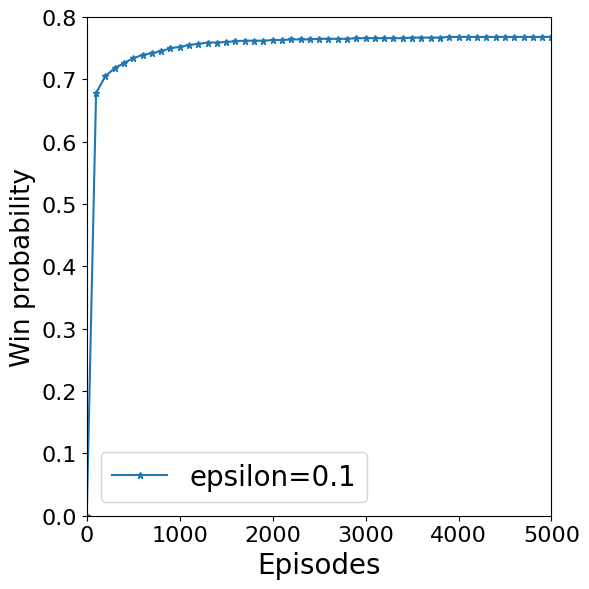

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# csv_dataM1_eps5 = pd.read_csv('Q_learning_M3-P4321-eps0.01-50runs5000episode.csv',skiprows= lambda x: x>0 and (x-1)%10 !=0)
csv_dataM1_eps10 = pd.read_csv('Q_learning_M3-P4321-eps0.1-50runs5000episode.csv',skiprows= lambda x: x>0 and (x-1)%10 !=0)
# csv_dataM1_eps30 = pd.read_csv('Q_learning_M3-P4321-eps0.3-50runs5000episode.csv',skiprows= lambda x: x>0 and (x-1)%10 !=0)
# csv_dataM1_eps50 = pd.read_csv('Q_learning_M3-P4321-eps0.6-50runs5000episode.csv',skiprows= lambda x: x>0 and (x-1)%10 !=0)
# csv_dataM1_eps80 = pd.read_csv('Q_learning_M3-P4321-eps0.8-50runs5000episode.csv',skiprows= lambda x: x>0 and (x-1)%10 !=0)

# Prob1 = csv_dataM1_eps5.iloc[:,1]
Prob2 = csv_dataM1_eps10.iloc[:,1]
# Prob3 = csv_dataM1_eps30.iloc[:,1]
# Prob4 = csv_dataM1_eps50.iloc[:,1]
# Prob5 = csv_dataM1_eps80.iloc[:,1]

figsize = 6,6
figure, ax =plt.subplots(figsize=figsize)
plt.xlim((0,5000))
plt.ylim(0,0.8)
x = [y*100 for y in range(51)]

# A, = plt.plot(x,Prob1,marker='o',ms=5,mew=1, label ='epsilon=0.01')
B, = plt.plot(x,Prob2,marker='*',ms=5,mew=1, label='epsilon=0.1')
# C, = plt.plot(x,Prob3,marker='+',ms=5,mew=1, label='epsilon=0.3')
# D, = plt.plot(x,Prob4,marker='.',ms=5,mew=1, label ='epsilon=0.6')
# E, = plt.plot(x,Prob5,marker='s',ms=5,mew=1, label ='epsilon=0.8')

plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontname('Time New Roman') for label in labels]
# [label for label in labels]
plt.ylabel('Win probability',fontsize=19)
plt.xlabel('Episodes',fontsize=20)
# font1 ={'family':'Times New Roman',
#         'weight':'normal',
#         'size':20,
#         }
font1 ={'weight':'normal',
        'size':20,
        }
# legend = plt.legend(handles=[A,B,C,D,E],prop=font1)
legend = plt.legend(handles=[B],prop=font1)
plt.savefig("fig1-5000.png", dpi=300)
plt.show()



# plot_fig-eps-STEP-boxplot.py

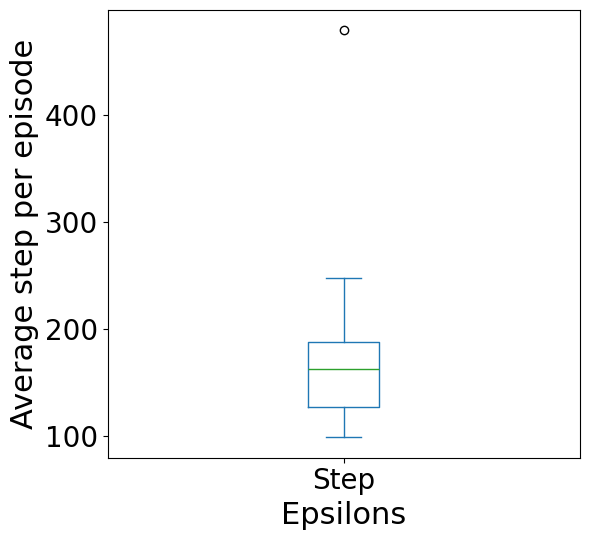

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#df = pd.read_csv('Step_M3-P4321-eps5-10-30-50-80.csv',skiprows=lambda x: x>0 and (x-1)%100 !=0)
df = pd.read_csv('Step_M3-P4321-eps0.1.csv',skiprows=lambda x: x>0 and (x-1)%100 !=0, usecols=['Step'])

plt.rcParams["figure.figsize"] = [6, 5.5]
plt.rcParams["figure.autolayout"] = True

ax2 = df.plot.box()
plt.tick_params(labelsize=20)
labels = ax2.get_xticklabels() + ax2.get_yticklabels()
# [label.set_fontname('Time New Roman') for label in labels]
# [label for label in labels]
plt.ylabel('Average step per episode',fontsize=22)
plt.xlabel('Epsilons',fontsize=22)
plt.savefig("fig4.png", dpi=300)
plt.show()



